In [3]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [4]:
# loading the dataset
bd_train=pd.read_csv('bigdatamart_Train.csv')
bd_test=pd.read_csv('bigdatamart_Test.csv')

In [5]:
bd_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [6]:
bd_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [7]:
# chaking the rows and columns
bd_train.shape

(8523, 12)

In [8]:
# checking missing values 
bd_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
# filling the missing values
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy= 'mean')
bd_train['Item_Weight']=imp.fit_transform(bd_train['Item_Weight'].values.reshape(-1,1))

In [10]:
imp = SimpleImputer( strategy= 'most_frequent')
bd_train['Outlet_Size']=imp.fit_transform(bd_train['Outlet_Size'].values.reshape(-1,1))

<AxesSubplot:>

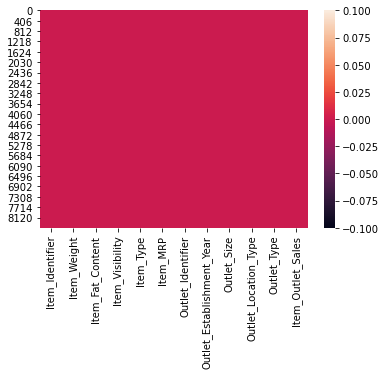

In [11]:
sns.heatmap(bd_train.isnull())

In [12]:
# summary statistics
bd_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [13]:
# data information
bd_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [14]:
bd_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [15]:
bd_train = bd_train.drop(['Outlet_Identifier','Item_Identifier'],axis=1)

In [16]:
bd_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


# Data Visualization

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

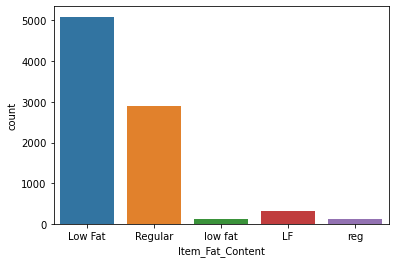

In [17]:
sns.countplot(bd_train['Item_Fat_Content'])

In [18]:
bd_train =  bd_train.replace(to_replace ="low fat",  value ="Low Fat") 
bd_train =  bd_train.replace(to_replace ="LF",  value ="Low Fat") 
bd_train =  bd_train.replace(to_replace ="reg",  value ="Regular") 

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

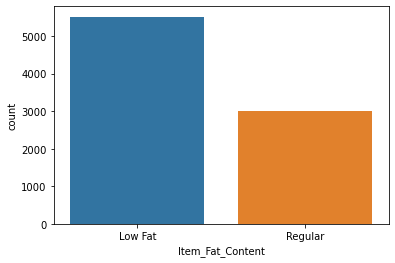

In [19]:
sns.countplot(bd_train['Item_Fat_Content'])

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

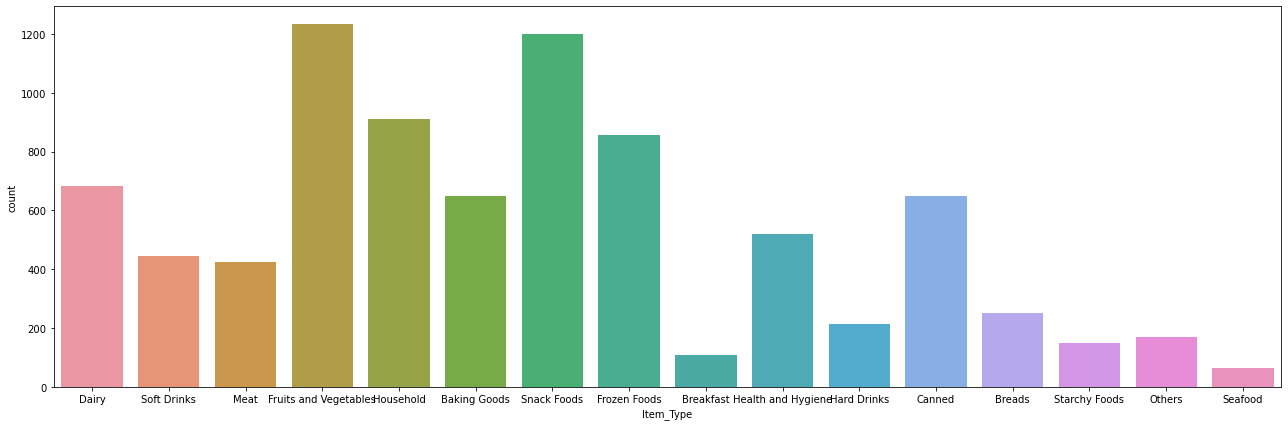

In [20]:
plt.figure(figsize=(22,7))
sns.countplot(bd_train['Item_Type'])

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

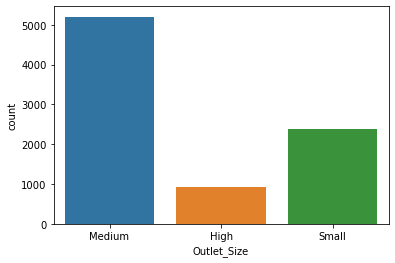

In [21]:
sns.countplot(bd_train['Outlet_Size'])

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

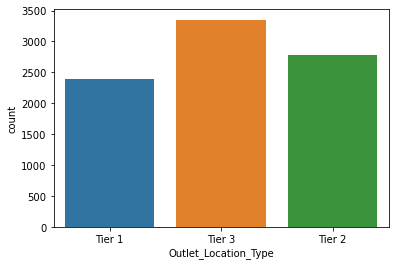

In [22]:
sns.countplot(bd_train['Outlet_Location_Type'])

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

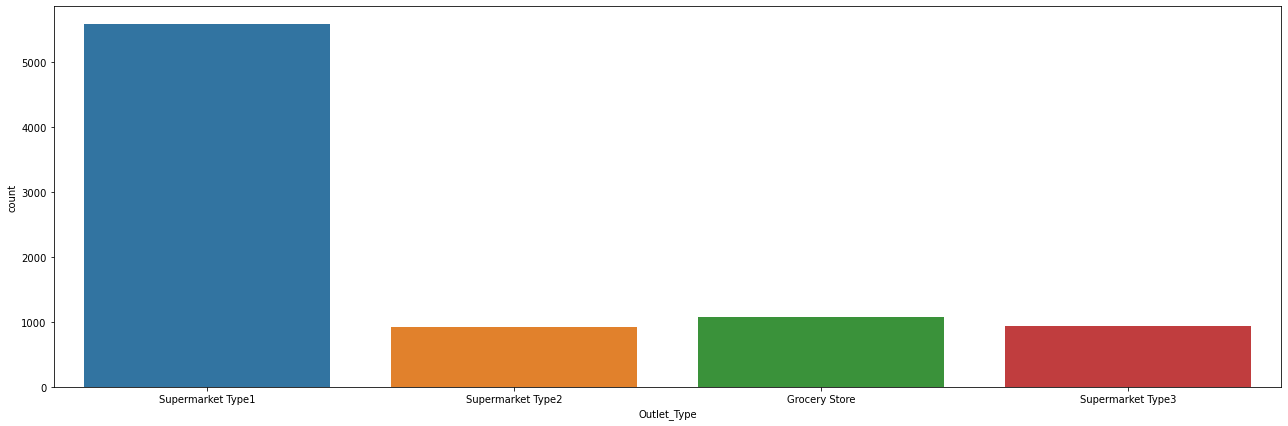

In [23]:
plt.figure(figsize=(22,7))
sns.countplot(bd_train['Outlet_Type'])

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

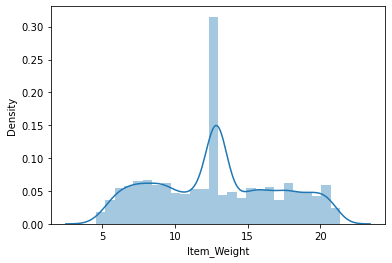

In [24]:
sns.distplot(bd_train['Item_Weight'])

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

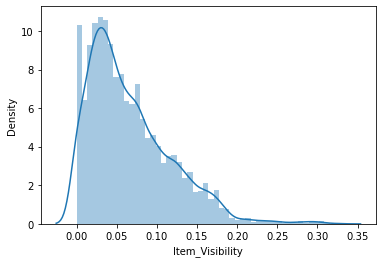

In [25]:
sns.distplot(bd_train['Item_Visibility'])

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

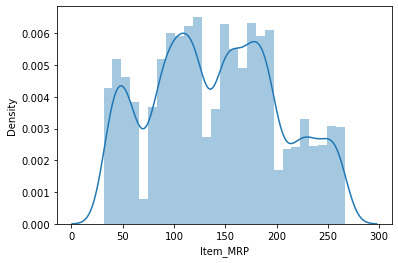

In [26]:
sns.distplot(bd_train['Item_MRP'])

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Density'>

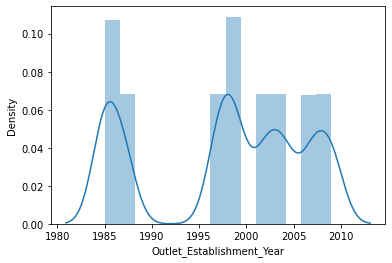

In [27]:
sns.distplot(bd_train['Outlet_Establishment_Year'])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

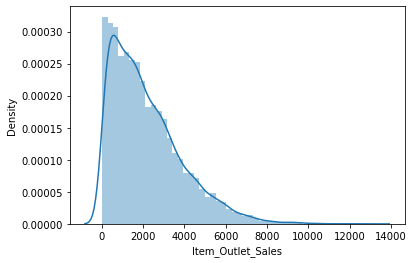

In [28]:
sns.distplot(bd_train['Item_Outlet_Sales'])

In [29]:
bd_train['qty_sold'] = (bd_train['Item_Outlet_Sales']/bd_train['Item_MRP'])

In [30]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [31]:
for i in bd_train.columns:
    if bd_train[i].dtypes == "object":
        bd_train[i]=enc.fit_transform(bd_train[i].values.reshape(-1,1))

In [32]:
bd_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,qty_sold
0,9.300,0.0,0.016047,4.0,249.8092,1999,1.0,0.0,1.0,3735.1380,14.951963
1,5.920,1.0,0.019278,14.0,48.2692,2009,1.0,2.0,2.0,443.4228,9.186454
2,17.500,0.0,0.016760,10.0,141.6180,1999,1.0,0.0,1.0,2097.2700,14.809346
3,19.200,1.0,0.000000,6.0,182.0950,1998,1.0,2.0,0.0,732.3800,4.021967
4,8.930,0.0,0.000000,9.0,53.8614,1987,0.0,2.0,1.0,994.7052,18.467868
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.0,0.056783,13.0,214.5218,1987,0.0,2.0,1.0,2778.3834,12.951520
8519,8.380,1.0,0.046982,0.0,108.1570,2002,1.0,1.0,1.0,549.2850,5.078589
8520,10.600,0.0,0.035186,8.0,85.1224,2004,2.0,1.0,1.0,1193.1136,14.016447
8521,7.210,1.0,0.145221,13.0,103.1332,2009,1.0,2.0,2.0,1845.5976,17.895281


# correleation

In [33]:
bd_train_corr=bd_train.corr()
bd_train_corr

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,qty_sold
Item_Weight,1.000000,-0.021157,-0.012049,0.028015,0.024756,-0.008301,-0.007225,0.004088,-0.000566,0.011550,-0.009103
Item_Fat_Content,-0.021157,1.000000,0.047314,-0.139434,0.006063,0.003151,-0.000622,-0.001598,0.002199,0.018719,0.014129
Item_Visibility,-0.012049,0.047314,1.000000,-0.035249,-0.001315,-0.074834,0.069309,-0.028099,-0.173468,-0.128625,-0.161024
Item_Type,0.028015,-0.139434,-0.035249,1.000000,0.032651,0.004970,-0.001859,0.003084,0.003053,0.017048,0.005815
Item_MRP,0.024756,0.006063,-0.001315,0.032651,1.000000,0.005020,0.006059,0.000232,-0.001975,0.567574,0.011144
Outlet_Establishment_Year,-0.008301,0.003151,-0.074834,0.004970,0.005020,1.000000,0.193389,-0.089216,-0.122304,-0.049135,-0.074536
Outlet_Size,-0.007225,-0.000622,0.069309,-0.001859,0.006059,0.193389,1.000000,-0.614311,-0.201483,-0.086182,-0.111396
Outlet_Location_Type,0.004088,-0.001598,-0.028099,0.003084,0.000232,-0.089216,-0.614311,1.000000,0.467219,0.089367,0.114897
Outlet_Type,-0.000566,0.002199,-0.173468,0.003053,-0.001975,-0.122304,-0.201483,0.467219,1.000000,0.401522,0.537622
Item_Outlet_Sales,0.011550,0.018719,-0.128625,0.017048,0.567574,-0.049135,-0.086182,0.089367,0.401522,1.000000,0.759315


<AxesSubplot:>

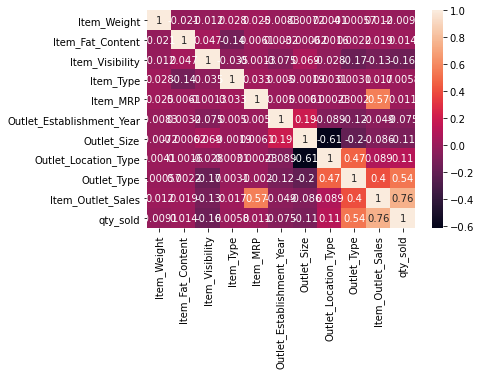

In [34]:
sns.heatmap(bd_train.corr(),annot=True)

<AxesSubplot:>

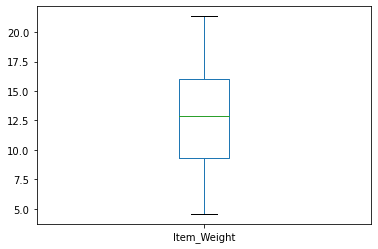

In [35]:
bd_train['Item_Weight'].plot.box()

<AxesSubplot:>

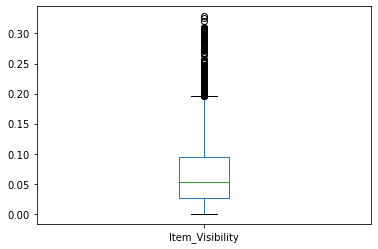

In [36]:
bd_train['Item_Visibility'].plot.box()

<AxesSubplot:>

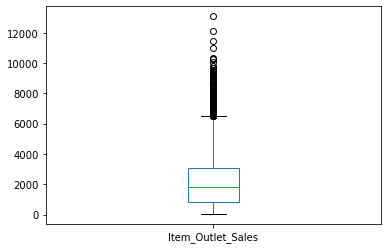

In [37]:
bd_train['Item_Outlet_Sales'].plot.box()

In [38]:
bd_train.skew()

Item_Weight                  0.090561
Item_Fat_Content             0.616705
Item_Visibility              1.167091
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Outlet_Size                 -0.087072
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
Item_Outlet_Sales            1.177531
qty_sold                     0.539952
dtype: float64

In [39]:
bd_train.shape

(8523, 11)

In [49]:

x = bd_train.iloc[:,:-1]
y = bd_train.iloc[:,-1]

In [41]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state= 45)

# Linear Regression

In [42]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)

print("Predicted results price:",pred)
print("actual price ",y_test)

Predicted results price: [12.91184328 16.15723071 -1.43852226 ...  7.85628749 20.78913255
 25.84426209]
actual price  4454    13.049746
4743    17.959739
3017     3.016083
5753    11.095437
1478    24.837803
          ...    
5132    10.207612
1789     1.007480
1720     6.980144
4430    23.829567
8411    25.713365
Name: qty_sold, Length: 1705, dtype: float64


# RandomForestRegressor

In [43]:
from sklearn.ensemble import RandomForestRegressor
rm = RandomForestRegressor()
rm.fit(x_train, y_train)
pred1 = rm.predict(x_test)
print("Predicted results price:",pred1)
print("actual price ",y_test)

Predicted results price: [13.01066572 18.0082856   3.0125617  ...  7.0505245  23.93155677
 25.83067086]
actual price  4454    13.049746
4743    17.959739
3017     3.016083
5753    11.095437
1478    24.837803
          ...    
5132    10.207612
1789     1.007480
1720     6.980144
4430    23.829567
8411    25.713365
Name: qty_sold, Length: 1705, dtype: float64


# DecisionTreeRegressor

In [44]:
from sklearn.tree import DecisionTreeRegressor
tr = DecisionTreeRegressor()
tr.fit(x_train, y_train)
pred2 = tr.predict(x_train)
print("Predicted results price:",pred2)
print("actual price ",y_test)

Predicted results price: [17.03543825 13.09054582 14.14054845 ...  4.95926557 16.7618533
  1.95414022]
actual price  4454    13.049746
4743    17.959739
3017     3.016083
5753    11.095437
1478    24.837803
          ...    
5132    10.207612
1789     1.007480
1720     6.980144
4430    23.829567
8411    25.713365
Name: qty_sold, Length: 1705, dtype: float64


# SVR

In [45]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train,y_train)
pred3 = svr.predict(x_test)
print("Predicted results price:",pred3)
print("actual price ",y_test)

Predicted results price: [16.60461579 14.7774891   3.34245272 ...  9.20054379 18.90540157
 23.53022822]
actual price  4454    13.049746
4743    17.959739
3017     3.016083
5753    11.095437
1478    24.837803
          ...    
5132    10.207612
1789     1.007480
1720     6.980144
4430    23.829567
8411    25.713365
Name: qty_sold, Length: 1705, dtype: float64


In [46]:
#error:
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error :',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

Mean absolute error: 2.4350990368056924
Mean squared error : 12.308772342024861
Root Mean Squared Error: 3.50838600242688


# cross validation

In [47]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lr,x,y, cv=5)
print(score)
print(score.mean())
print(score.std())

[0.84681553 0.8499309  0.84600633 0.85707132 0.84558327]
0.8490814696796972
0.004275221806472619


# saving model

In [48]:
import joblib
joblib.dump(lr,'bigmart.pkl')

['bigmart.pkl']